## Create Latitude and Longitude Combinations

In [89]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [91]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [92]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [93]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

The code on the cell above:
    
• We create a cities list to store city names.

• We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.

• We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 

We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

# Get the City Weather Data

MOdule 6.2.6

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
8. Parse the JSON weather data for the following:

    • City, country, and date
    
    • Latitude and longitude
    
    • Maximum temperature
    
    • Humidity
    
    • Cloudiness
    
    • Wind speed
    
    
9. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


## Import Dependencies, and Initialize an Empty List and Counters

In [117]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [95]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [41]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [42]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | sunbury
Processing Record 20 of Set 1 | guaruja
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | krasnoselkup
Processing Record 23 of Set 1 | pembroke
P

Processing Record 38 of Set 4 | along
Processing Record 39 of Set 4 | lagos
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | marfino
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | axim
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | dossor
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | petropavlivka
Processing Record 50 of Set 4 | rock springs
Processing Record 1 of Set 5 | mont-dore
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | winslow
Processing Record 8 of Set 5 | taseyevo
Processing Record 9 of Set 5 | batagay
Processing Record 10 of Set 5 | maragogi
Processing Recor

Processing Record 28 of Set 8 | mariental
Processing Record 29 of Set 8 | klaksvik
Processing Record 30 of Set 8 | maiduguri
Processing Record 31 of Set 8 | emmett
Processing Record 32 of Set 8 | moron
Processing Record 33 of Set 8 | ambalavao
Processing Record 34 of Set 8 | tucuma
Processing Record 35 of Set 8 | chapleau
Processing Record 36 of Set 8 | oranjestad
Processing Record 37 of Set 8 | lemesos
City not found. Skipping...
Processing Record 38 of Set 8 | kuliyapitiya
Processing Record 39 of Set 8 | lloydminster
Processing Record 40 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 42 of Set 8 | shimoda
Processing Record 43 of Set 8 | verkhnyaya sinyachikha
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | nacala
Processing Record 46 of Set 8 | mount darwin
Processing Record 47 of Set 8 | scalea
Processing Record 48 of Set 8 | teguise
Processing Record 49 of Set 8 | uray
Pr

Processing Record 15 of Set 12 | rio tercero
Processing Record 16 of Set 12 | tjome
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | kupino
Processing Record 19 of Set 12 | srandakan
Processing Record 20 of Set 12 | hami
Processing Record 21 of Set 12 | zheleznodorozhnyy
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | yima
Processing Record 24 of Set 12 | inhambane
Processing Record 25 of Set 12 | abbeville
Processing Record 26 of Set 12 | muncar
Processing Record 27 of Set 12 | itaituba
Processing Record 28 of Set 12 | redmond
Processing Record 29 of Set 12 | qena
Processing Record 30 of Set 12 | sabang
Processing Record 31 of Set 12 | abalak
Processing Record 32 of Set 12 | sorland
Processing Record 33 of Set 12 | grand gaube
Processing Record 34 of Set 12 | ayagoz
Processing Record 35 of Set 12 | williams lake
Processing Record 36 of Set 12 | yeniseysk
Processing Record 37 of Set 12 | kurilsk
Processing Record 38 of Set 12 | saint s

# Create a DataFrame of City Weather Data

Module 6.2.7

In [96]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.32,71,24,18.16,PF,2022-03-02 20:38:33
1,Kavaratti,10.5669,72.6420,82.24,65,84,11.56,IN,2022-03-02 20:38:34
2,Khatanga,71.9667,102.5000,-1.43,88,100,8.21,RU,2022-03-02 20:38:34
3,Ushuaia,-54.8000,-68.3000,53.26,54,75,19.57,AR,2022-03-02 20:33:58
4,Albany,42.6001,-73.9662,40.08,56,97,7.67,US,2022-03-02 20:38:35
5,Touros,-5.1989,-35.4608,86.90,74,68,9.66,BR,2022-03-02 20:38:35
6,Bandarbeyla,9.4942,50.8122,75.69,72,8,13.80,SO,2022-03-02 20:38:35
7,Atuona,-9.8000,-139.0333,77.95,80,24,19.30,PF,2022-03-02 20:38:36
8,Cape Town,-33.9258,18.4232,70.12,89,20,6.91,ZA,2022-03-02 20:34:13
9,Qaanaaq,77.4840,-69.3632,4.62,53,8,8.61,GL,2022-03-02 20:38:36


In [97]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-02 20:38:33,-23.1203,-134.9692,79.32,71,24,18.16
1,Kavaratti,IN,2022-03-02 20:38:34,10.5669,72.6420,82.24,65,84,11.56
2,Khatanga,RU,2022-03-02 20:38:34,71.9667,102.5000,-1.43,88,100,8.21
3,Ushuaia,AR,2022-03-02 20:33:58,-54.8000,-68.3000,53.26,54,75,19.57
4,Albany,US,2022-03-02 20:38:35,42.6001,-73.9662,40.08,56,97,7.67
5,Touros,BR,2022-03-02 20:38:35,-5.1989,-35.4608,86.90,74,68,9.66
6,Bandarbeyla,SO,2022-03-02 20:38:35,9.4942,50.8122,75.69,72,8,13.80
7,Atuona,PF,2022-03-02 20:38:36,-9.8000,-139.0333,77.95,80,24,19.30
8,Cape Town,ZA,2022-03-02 20:34:13,-33.9258,18.4232,70.12,89,20,6.91
9,Qaanaaq,GL,2022-03-02 20:38:36,77.4840,-69.3632,4.62,53,8,8.61


In [98]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature
Module 6.3.1 

## Get Data for Plotting

In [113]:
 # File to Load
city_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv("weather_data/cities.csv")

In [114]:
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2022-03-02 20:38:33,-23.1203,-134.9692,79.32,71,24,18.16
1,1,Kavaratti,IN,2022-03-02 20:38:34,10.5669,72.6420,82.24,65,84,11.56
2,2,Khatanga,RU,2022-03-02 20:38:34,71.9667,102.5000,-1.43,88,100,8.21
3,3,Ushuaia,AR,2022-03-02 20:33:58,-54.8000,-68.3000,53.26,54,75,19.57
4,4,Albany,US,2022-03-02 20:38:35,42.6001,-73.9662,40.08,56,97,7.67
5,5,Touros,BR,2022-03-02 20:38:35,-5.1989,-35.4608,86.90,74,68,9.66
6,6,Bandarbeyla,SO,2022-03-02 20:38:35,9.4942,50.8122,75.69,72,8,13.80
7,7,Atuona,PF,2022-03-02 20:38:36,-9.8000,-139.0333,77.95,80,24,19.30
8,8,Cape Town,ZA,2022-03-02 20:34:13,-33.9258,18.4232,70.12,89,20,6.91
9,9,Qaanaaq,GL,2022-03-02 20:38:36,77.4840,-69.3632,4.62,53,8,8.61


In [115]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot Latitude vs. Max Temperature

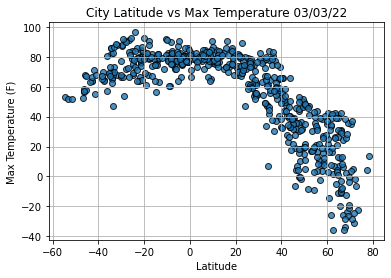

In [116]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

# Plot Latitude vs. Humidity

Module 6.3.2

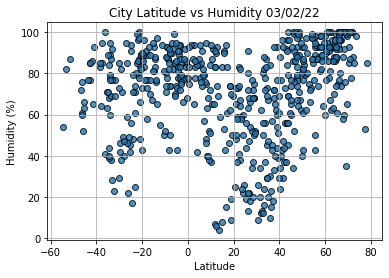

In [48]:
# Import time module
import time
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

# Plot Latitude vs. Cloudiness

Module 6.3.3

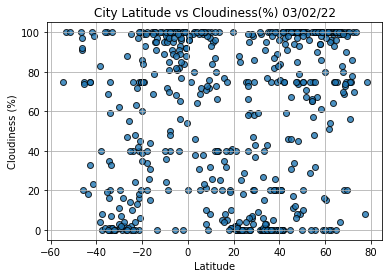

In [49]:
# Import time module
import time
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness(%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

# Plot Latitude vs. Wind Speed
Module 6.3.4

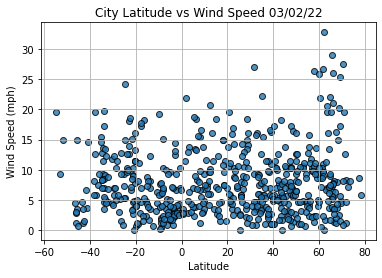

In [50]:
# Import time module
import time
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

## Create a Linear Regression Function

Module 6.4.2

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2022-03-02 20:38:38
Lat                       -33.918
Lng                       25.5701
Max Temp                    70.09
Humidity                       78
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [53]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: Lat, Length: 569, dtype: bool

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kavaratti,IN,2022-03-02 20:38:34,10.5669,72.6420,82.24,65,84,11.56
2,Khatanga,RU,2022-03-02 20:38:34,71.9667,102.5000,-1.43,88,100,8.21
4,Albany,US,2022-03-02 20:38:35,42.6001,-73.9662,40.08,56,97,7.67
6,Bandarbeyla,SO,2022-03-02 20:38:35,9.4942,50.8122,75.69,72,8,13.80
9,Qaanaaq,GL,2022-03-02 20:38:36,77.4840,-69.3632,4.62,53,8,8.61


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

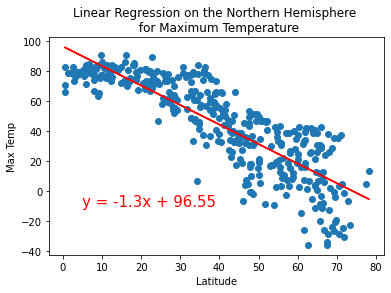

In [66]:
# Linear regression on the Northern Hemisphere for Maximun Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,-10))

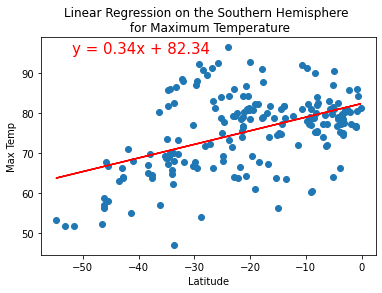

In [67]:
# Linear regression on the Southern Hemisphere for Maximun Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-52,95))

## Find the Correlation Between Latitude and Percent Humidity

Module 6.4.3

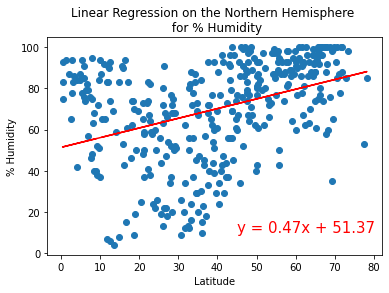

In [68]:
# Linear regression on the Northern Hemisphere for % Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,10))

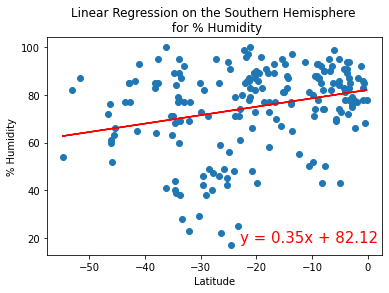

In [71]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-23,18))

### Find the Correlation Between Latitude and Percent Cloudiness
Module 6.4.4

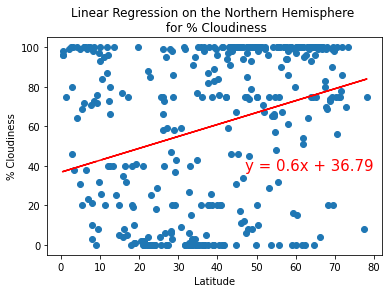

In [75]:
# Linear regression on the Northern Hemisphere for % Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(47,38))

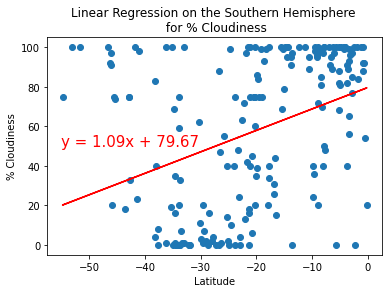

In [81]:
# Linear regression on the Southern Hemisphere for % Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,50))

### Find the Correlation Between Latitude and Wind Speed

Module 6.4.5

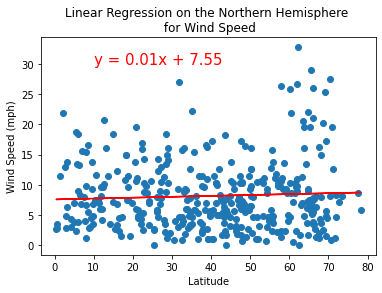

In [83]:
# Linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(10,30))

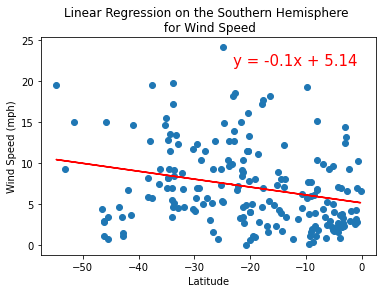

In [84]:
# Linear regression on the Southern Hemisphere for Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',(-23,22))